# Building a perceptron



This post is mostly for my own reference so I can find my notes and explanation to myself on this issue easily. It might have some value to others.

Sigmoid Function
The sigmoid function is one of many possible functions that are used as a nonlinear activation function between layers of a neural network. 
I think the most appealing property that makes sigmoid fuction so usefull is that, it gives output value between 0 and 1, with is usefull for binary classification. 


 Input values $x_1, x_2,x_3$ synapse weigths $w_1.w_2.w_3$ neuron $  f(\displaystyle\sum_{i=1}^n x_i w_i)$ output $\hat{y}$ <br>
 So in this case $(\displaystyle\sum_{i=1}^n x_i w_i)=\displaystyle\sum_{i=1}^3 x_1 w_1 + x_2 w_2 +x_3 w_3 $ 

#### Sigmoid  and sigmoid derivative plot
The reason why calculating the derivative of this function is important, is because the learning process for neural networks involves making small changes to parameters, proportional to the partial derivatives of those parameter values, and relative to the loss function. This requires stepping backwards through the layers, applying the chain rule along each step. So, one of those components that require calculation, is the derivative of the activation function.

/Users/povilassabaliauskas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


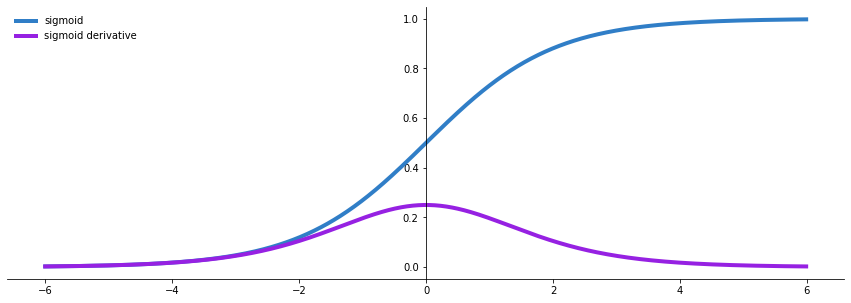

In [227]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def sigmoid(x):
    return 1./(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)

# Calculate plot points
x = np.arange(-6., 6., 0.01)
y = sigmoid(x)
dx = sigmoid_derivative(y)
#dz = dx*(1-sigmoid(dx))

# Setup centered axes
fig, ax = plt.subplots(figsize=(15, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create and show plot
ax.plot(x,y, color="#307EC7", linewidth=4, label="sigmoid")
ax.plot(x,dx, color="#9621E2", linewidth=4, label="sigmoid derivative")
#ax.plot(x,dz,color='#abc222', linewidth=4,label='just')
ax.legend(loc="upper left", frameon=False)
fig.show()


Sigmoid normalizing function f(x) in this case so that all values would be from 0 to 1 we use this fuction $f(x)=\frac{1}{1+e^{-x}} \to f(x)=\frac{1}{1+e^{\sum_{i=1}^n x_i w_i}}$

In [200]:
training_input = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,0],
                            [0,1,0],
                            [0,1,1],
                            [1,0,1]])
'''This is a row but we transpose it becouse I'm lazy, without transpose I should write, 
training_outputs = np.array([[0],
                             [1],
                             [1],
                             [0],
                             [0])

'''

training_outputs = np.array([[0,1,1,0,0,1]]).T

In [201]:
np.random.seed(199)

In [204]:
# Briefly explaining this line of code, we create matrix 3 by 1, and generate number between 1 and 0 
#then we multipy by 2 and subtract -1 so that the range would be between 1 and -1
s_weights = 2 * np.random.random((3, 1)) -1

In [205]:
print(f"printing initial value of weights: \n{s_weights}")
for i in range(1):
    for iteration in range(1000):
        input_layer = training_input
        #so basically this line is the whole formula from above, to normalize the product of the input layer with the synaptic weights
        outputs = sigmoid(np.dot(input_layer,s_weights))
        #calculating errror rate for adjusting s_weights for better rezults
        # comparing given rates, to calculated rates 
        error_rate = training_outputs - outputs
        # making the adjustmend with sigmoid_derivative function
        adjustment = error_rate * sigmoid_derivative(outputs)
        #Updating weights
        s_weights += np.dot(input_layer.T, adjustment)
    print(f"training our outputs \n {outputs}\n and our error_rates after each itteration \n{error_rate}")
print(f"synaptic weigts after training: \n {s_weights}")
print(f'outputs after training\n{outputs}')

printing initial value of weights: 
[[ 0.6883052 ]
 [-0.0723153 ]
 [ 0.08968613]]
training our outputs 
 [[0.15759797]
 [0.86627626]
 [0.99485543]
 [0.15186876]
 [0.03241353]
 [0.97310225]]
 and our error_rates after each itteration 
[[-0.15759797]
 [ 0.13372374]
 [ 0.00514457]
 [-0.15186876]
 [-0.03241353]
 [ 0.02689775]]
training our outputs 
 [[0.1114534 ]
 [0.90460001]
 [0.99836847]
 [0.10995447]
 [0.01525934]
 [0.98713912]]
 and our error_rates after each itteration 
[[-0.1114534 ]
 [ 0.09539999]
 [ 0.00163153]
 [-0.10995447]
 [-0.01525934]
 [ 0.01286088]]
training our outputs 
 [[0.09040252]
 [0.92238928]
 [0.99917649]
 [0.08971502]
 [0.00970031]
 [0.99177552]]
 and our error_rates after each itteration 
[[-0.09040252]
 [ 0.07761072]
 [ 0.00082351]
 [-0.08971502]
 [-0.00970031]
 [ 0.00822448]]
synaptic weigts after training: 
 [[ 7.10673503]
 [-2.31898343]
 [-2.31063398]]
outputs after training
[[0.09040252]
 [0.92238928]
 [0.99917649]
 [0.08971502]
 [0.00970031]
 [0.99177552]]
